In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings ## used to ignore warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec

#Some styling
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv('split/train.csv')
df_val = pd.read_csv('split/val.csv')
df_test = pd.read_csv('split/test.csv')

In [3]:
print(df.shape,df_val.shape, df_test.shape)

(1000000, 10) (229319, 10) (229322, 10)


In [4]:
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [5]:
df_val.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [6]:
df_test.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
df.head(20)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967
5,id2734699,2,2016-04-14 12:17:42,3,-73.969833,40.768570,-73.962646,40.767181,N,374
6,id2151697,2,2016-03-17 21:10:43,1,-73.988419,40.760006,-73.980530,40.782890,N,1252
7,id3635863,1,2016-02-05 06:43:21,1,-73.987854,40.749695,-73.985397,40.755932,N,148
8,id2169697,2,2016-03-22 14:08:02,1,-73.955017,40.764462,-73.996811,40.716560,N,1499
9,id2225613,1,2016-03-29 23:32:47,1,-73.971535,40.794827,-73.931709,40.858223,N,1017


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  object 
 1   vendor_id           1000000 non-null  int64  
 2   pickup_datetime     1000000 non-null  object 
 3   passenger_count     1000000 non-null  int64  
 4   pickup_longitude    1000000 non-null  float64
 5   pickup_latitude     1000000 non-null  float64
 6   dropoff_longitude   1000000 non-null  float64
 7   dropoff_latitude    1000000 non-null  float64
 8   store_and_fwd_flag  1000000 non-null  object 
 9   trip_duration       1000000 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 76.3+ MB


In [9]:
df.tail()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
999995,id2875371,2,2016-03-25 15:48:58,1,-73.959106,40.771770,-73.953995,40.786312,N,254
999996,id1038420,2,2016-05-04 19:36:44,1,-73.970978,40.764015,-73.956230,40.777851,N,434
999997,id3238884,2,2016-05-19 08:50:41,2,-73.982178,40.771240,-73.970749,40.758968,N,1306
999998,id3652642,2,2016-04-04 14:37:59,6,-73.982513,40.765533,-74.005974,40.711842,N,2317
999999,id0887693,2,2016-02-24 11:30:56,1,-73.970810,40.761436,-73.991852,40.734692,N,1207


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1000000.0,1.534793,0.498788,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1000000.0,1.665353,1.315723,0.000000,1.000000,1.000000,2.000000,7.000000e+00
pickup_longitude,1000000.0,-73.973475,0.065404,-121.933342,-73.991852,-73.981728,-73.967346,-6.133553e+01
pickup_latitude,1000000.0,40.750947,0.033745,34.359695,40.737372,40.754131,40.768379,5.188108e+01
dropoff_longitude,1000000.0,-73.973421,0.065432,-121.933304,-73.991341,-73.979767,-73.963036,-6.133553e+01
dropoff_latitude,1000000.0,40.751829,0.035782,34.359695,40.735928,40.754551,40.769833,4.392103e+01
trip_duration,1000000.0,954.884971,3882.070116,1.000000,397.000000,662.000000,1074.000000,2.227612e+06


- Seems there is an outliers in pickup/dropoff longitude/latitude, max and min values out of NYC
- Same for trip duration min is 1 second and max very big value and ~= 25 days (unrealistic). 

In [11]:
#Let's look at the skewness of integers and floats features in our dataset
df_nums = df[['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration']]
df_nums.skew()

passenger_count        2.125937
pickup_longitude    -383.018403
pickup_latitude       16.821486
dropoff_longitude   -386.828587
dropoff_latitude     -13.633751
trip_duration        202.555754
dtype: float64

- All of the data is either highly left/right skewed, specially longiudes and trip duration


In [12]:
q1_value = df['pickup_longitude'].quantile(0.1)

count_less_than_q1 = (df['pickup_longitude'] < q1_value).sum()

q99_value = df['pickup_longitude'].quantile(0.99)

count_more_than_q99 = (df['pickup_longitude'] > q99_value).sum()

print('pickup_longitude:',count_less_than_q1, count_more_than_q99)

q1_value = df['pickup_latitude'].quantile(0.1)

count_less_than_q1 = (df['pickup_latitude'] < q1_value).sum()

q99_value = df['pickup_latitude'].quantile(0.99)

count_more_than_q99 = (df['pickup_latitude'] > q99_value).sum()

print('pickup_latitude:',count_less_than_q1, count_more_than_q99)

pickup_longitude: 99910 9974
pickup_latitude: 99964 9998


In [13]:
q1_value = df['dropoff_longitude'].quantile(0.1)

count_less_than_q1 = (df['dropoff_longitude'] < q1_value).sum()

q99_value = df['dropoff_longitude'].quantile(0.99)

count_more_than_q99 = (df['dropoff_longitude'] > q99_value).sum()

print('dropoff_longitude:',count_less_than_q1, count_more_than_q99)


q1_value = df['dropoff_latitude'].quantile(0.1)

count_less_than_q1 = (df['dropoff_latitude'] < q1_value).sum()

q99_value = df['dropoff_latitude'].quantile(0.99)

count_more_than_q99 = (df['dropoff_latitude'] > q99_value).sum()

print('dropoff_latitude:',count_less_than_q1, count_more_than_q99)

dropoff_longitude: 99948 10000
dropoff_latitude: 99990 9998


In [14]:
q1_value = df['trip_duration'].quantile(0.1)

count_less_than_q1 = (df['trip_duration'] < q1_value).sum()

q99_value = df['trip_duration'].quantile(0.99)

count_more_than_q99 = (df['trip_duration'] > q99_value).sum()

print('trip_duration:',count_less_than_q1, count_more_than_q99)

trip_duration: 99449 10000


- As we can see there is a lot of data less than 1% percentile, also there is a good amount of data more than 99% percentile

- From here i will continue EDA and feature engineering on train, val datasets
- All feature engineering steps for test data will be made on load_eval_test.py

In [15]:
# Convert pickup_datetime from string to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], 
 format = '%Y-%m-%d %H:%M:%S', 
 errors = 'coerce')
df_val['pickup_datetime'] = pd.to_datetime(df_val['pickup_datetime'], 
 format = '%Y-%m-%d %H:%M:%S', 
 errors = 'coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1000000 non-null  object        
 1   vendor_id           1000000 non-null  int64         
 2   pickup_datetime     1000000 non-null  datetime64[ns]
 3   passenger_count     1000000 non-null  int64         
 4   pickup_longitude    1000000 non-null  float64       
 5   pickup_latitude     1000000 non-null  float64       
 6   dropoff_longitude   1000000 non-null  float64       
 7   dropoff_latitude    1000000 non-null  float64       
 8   store_and_fwd_flag  1000000 non-null  object        
 9   trip_duration       1000000 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 76.3+ MB


In [17]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229319 entries, 0 to 229318
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  229319 non-null  object        
 1   vendor_id           229319 non-null  int64         
 2   pickup_datetime     229319 non-null  datetime64[ns]
 3   passenger_count     229319 non-null  int64         
 4   pickup_longitude    229319 non-null  float64       
 5   pickup_latitude     229319 non-null  float64       
 6   dropoff_longitude   229319 non-null  float64       
 7   dropoff_latitude    229319 non-null  float64       
 8   store_and_fwd_flag  229319 non-null  object        
 9   trip_duration       229319 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 17.5+ MB


## Pick-up datetime and trip duration

#### Split Time

In [18]:
df['pickup_datetime_year'] = df['pickup_datetime'].dt.year
df['pickup_datetime_month'] = df['pickup_datetime'].dt.month
df['pickup_datetime_day'] = df['pickup_datetime'].dt.day
df['pickup_datetime_hour'] = df['pickup_datetime'].dt.hour
df['pickup_datetime_minute'] = df['pickup_datetime'].dt.minute
df['pickup_datetime_dayofweek'] = df['pickup_datetime'].dt.dayofweek
df['pickup_dt'] = (df['pickup_datetime'] - df['pickup_datetime'].min()).dt.total_seconds()
df['pickup_datetime_week_hour'] = df['pickup_datetime_dayofweek'] * 24 + df['pickup_datetime_hour']

In [19]:
df_val['pickup_datetime_year'] = df_val['pickup_datetime'].dt.year
df_val['pickup_datetime_month'] = df_val['pickup_datetime'].dt.month
df_val['pickup_datetime_day'] = df_val['pickup_datetime'].dt.day
df_val['pickup_datetime_hour'] = df_val['pickup_datetime'].dt.hour
df_val['pickup_datetime_minute'] = df_val['pickup_datetime'].dt.minute
df_val['pickup_datetime_dayofweek'] = df_val['pickup_datetime'].dt.dayofweek
df_val['pickup_dt'] = (df_val['pickup_datetime'] - df_val['pickup_datetime'].min()).dt.total_seconds()
df_val['pickup_datetime_week_hour'] = df_val['pickup_datetime_dayofweek'] * 24 + df_val['pickup_datetime_hour']

In [20]:
df.groupby('pickup_datetime_year').size()

pickup_datetime_year
2016    1000000
dtype: int64

In [21]:
df.groupby('pickup_datetime_month').size()

pickup_datetime_month
1    157629
2    163721
3    175745
4    172014
5    170499
6    160392
dtype: int64

In [22]:
df.groupby('pickup_datetime_dayofweek').size() # Monday = 0, Tuesday = 1...

pickup_datetime_dayofweek
0    128489
1    138794
2    144165
3    149942
4    152835
5    151454
6    134321
dtype: int64

In [23]:
df.groupby('pickup_datetime_hour').size()

pickup_datetime_hour
0     36380
1     26666
2     19115
3     14360
4     10853
5     10232
6     22823
7     38061
8     46002
9     46601
10    44914
11    46975
12    49153
13    49003
14    50877
15    49249
16    44255
17    52266
18    62028
19    61701
20    57635
21    57790
22    55044
23    48017
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   id                         1000000 non-null  object        
 1   vendor_id                  1000000 non-null  int64         
 2   pickup_datetime            1000000 non-null  datetime64[ns]
 3   passenger_count            1000000 non-null  int64         
 4   pickup_longitude           1000000 non-null  float64       
 5   pickup_latitude            1000000 non-null  float64       
 6   dropoff_longitude          1000000 non-null  float64       
 7   dropoff_latitude           1000000 non-null  float64       
 8   store_and_fwd_flag         1000000 non-null  object        
 9   trip_duration              1000000 non-null  int64         
 10  pickup_datetime_year       1000000 non-null  int32         
 11  pickup_datetime_month      1000000 non

In [25]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])
df_val['log_trip_duration'] = np.log1p(df_val['trip_duration'])

- log is important for better visualization

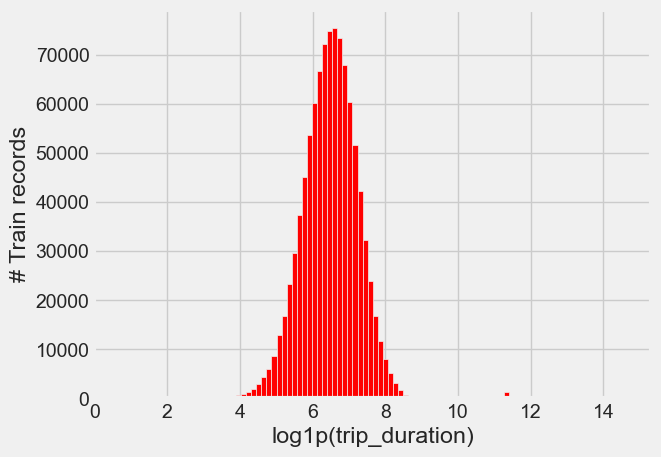

In [26]:
plt.hist(df['log_trip_duration'].values, bins=100, color='r')
plt.xlabel('log1p(trip_duration)')
plt.ylabel('# Train records')
plt.show()

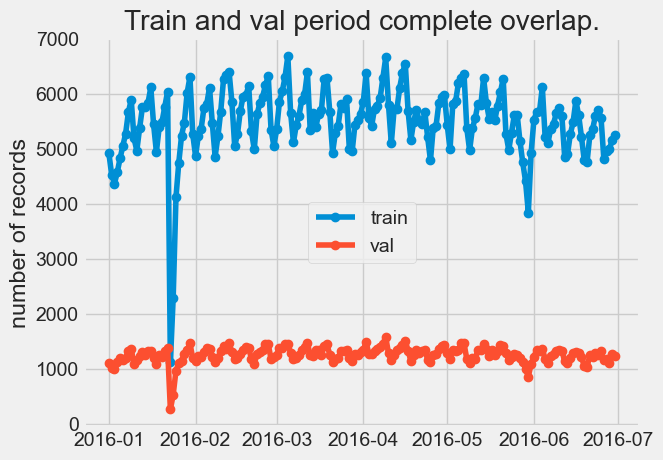

In [27]:
df['pickup_date'] = df['pickup_datetime'].dt.date
df_val['pickup_date'] = df_val['pickup_datetime'].dt.date

plt.plot(df.groupby('pickup_date').count()[['id']], 'o-', label='train')
plt.plot(df_val.groupby('pickup_date').count()[['id']], 'o-', label='val')
plt.title('Train and val period complete overlap.')
plt.legend(loc=0)
plt.ylabel('number of records')
plt.show()

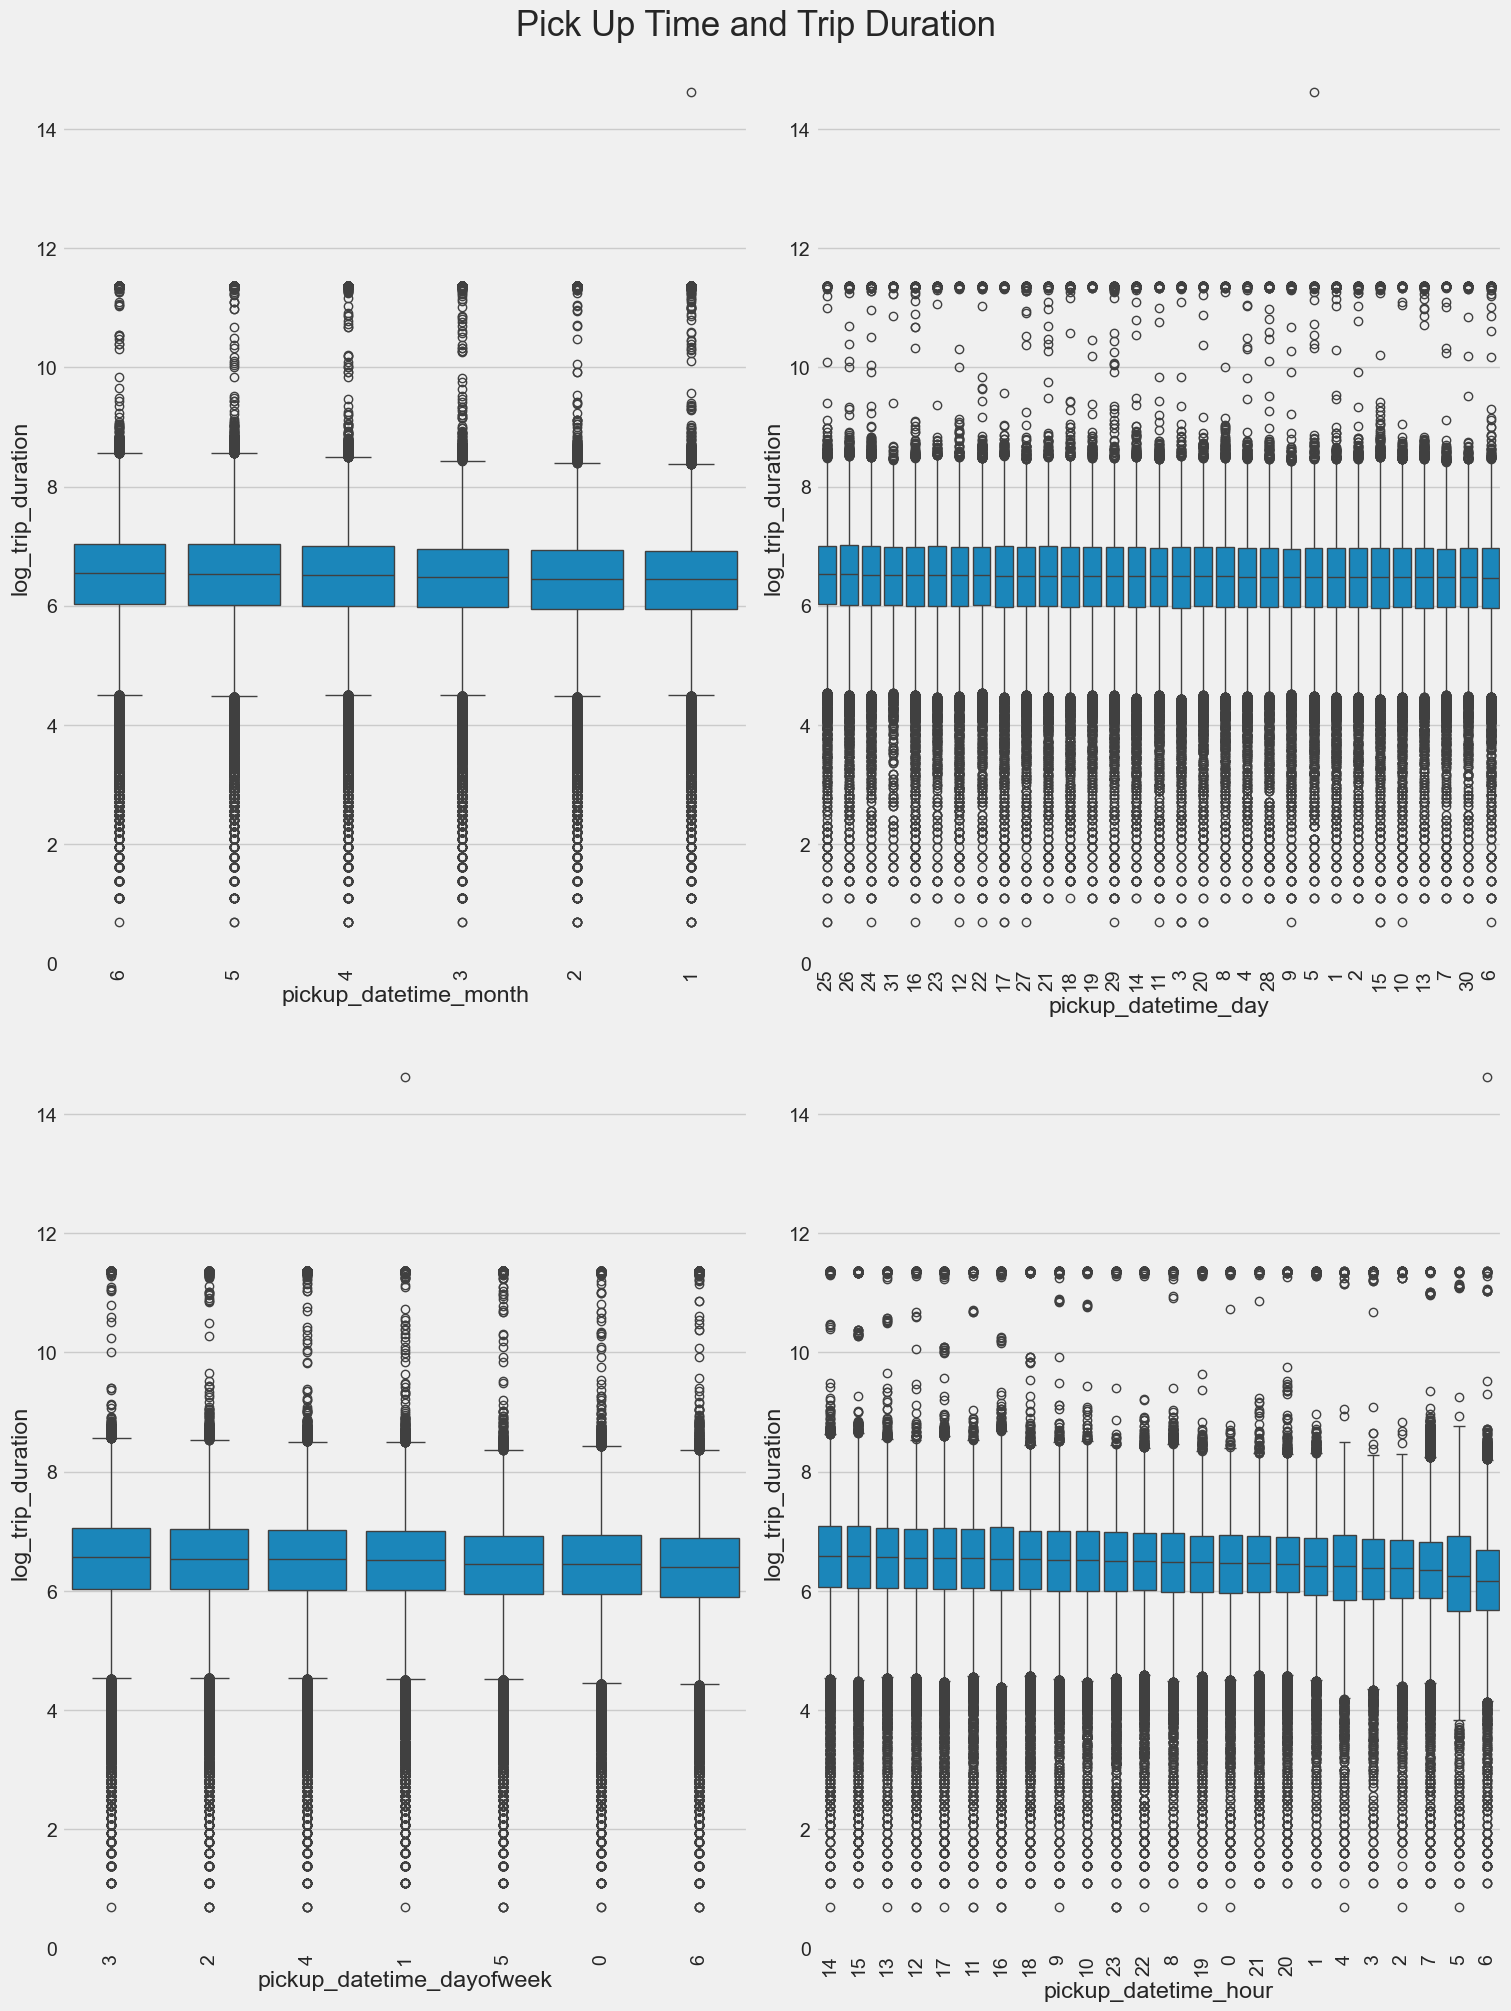

In [28]:
fig = plt.figure(constrained_layout=True,figsize=(15,20))
gs = gridspec.GridSpec(2, 2,figure=fig)

plt.subplot(gs[0,0])
table = df.groupby(['pickup_datetime_month'],as_index=False)['log_trip_duration'].median().sort_values(by='log_trip_duration',ascending=False)
a1 = sns.boxplot(data=df,x='pickup_datetime_month',y="log_trip_duration",order=table['pickup_datetime_month'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[0,1])
table = df.groupby(['pickup_datetime_day'],as_index=False)['log_trip_duration'].median().sort_values(by='log_trip_duration',ascending=False)
a1 = sns.boxplot(data=df,x='pickup_datetime_day',y="log_trip_duration",order=table['pickup_datetime_day'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,0])
table = df.groupby(['pickup_datetime_dayofweek'],as_index=False)['log_trip_duration'].median().sort_values(by='log_trip_duration',ascending=False)
a1 = sns.boxplot(data=df,x='pickup_datetime_dayofweek',y="log_trip_duration",order=table['pickup_datetime_dayofweek'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,1])
table = df.groupby(['pickup_datetime_hour'],as_index=False)['log_trip_duration'].median().sort_values(by='log_trip_duration',ascending=False)
a1 = sns.boxplot(data=df,x='pickup_datetime_hour',y="log_trip_duration",order=table['pickup_datetime_hour'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

fig.suptitle("Pick Up Time and Trip Duration",fontsize=25);

- Nothing special in month and day
- In dayofweek, weekends have less trip_duraion
- In hour: when pick up in pm specially in afternoon, trip duration is higher

In [29]:
# No need for it anymore
df = df.drop(['pickup_datetime'], axis=1)
df_val = df_val.drop(['pickup_datetime'], axis=1)

## Passenger Count and Trip Duration

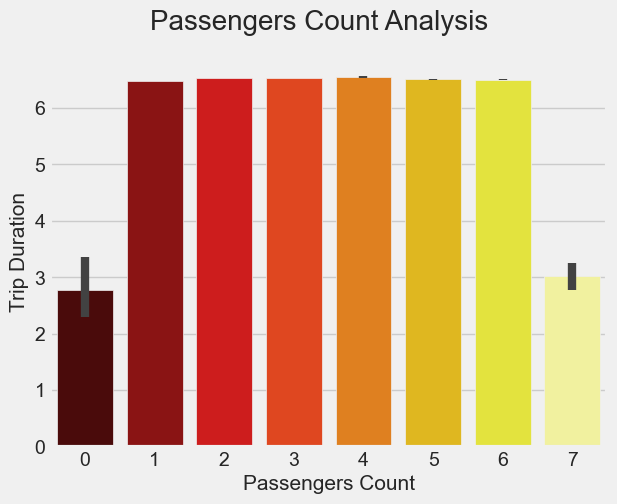

In [30]:
a1 = sns.barplot(data=df,x="passenger_count",y="log_trip_duration",estimator=np.median,palette='hot')
plt.xlabel("Passengers Count",fontsize=15)
plt.ylabel("Trip Duration",fontsize=15)
plt.suptitle("Passengers Count Analysis",fontsize=20);

In [31]:
for i in range(8):
    cnt = (df['passenger_count'] == i).sum()
    print(f'i = {i}, count = {cnt}')

i = 0, count = 38
i = 1, count = 708628
i = 2, count = 143907
i = 3, count = 41012
i = 4, count = 19491
i = 5, count = 53635
i = 6, count = 33287
i = 7, count = 2


- 0 and 7 are outliers

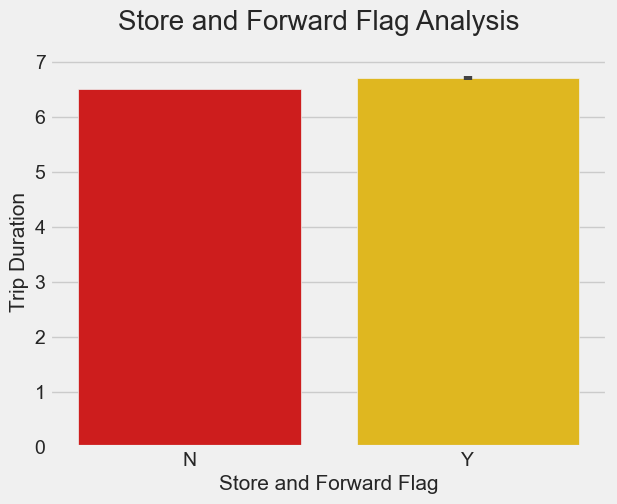

In [32]:
a1 = sns.barplot(data=df,x="store_and_fwd_flag",y="log_trip_duration",estimator=np.median,palette='hot')
plt.xlabel("Store and Forward Flag",fontsize=15)
plt.ylabel("Trip Duration",fontsize=15)
plt.suptitle("Store and Forward Flag Analysis",fontsize=20);

In [33]:
cnt_N = (df['store_and_fwd_flag'] == 'N').sum()
cnt_Y = (df['store_and_fwd_flag'] == 'Y').sum()
print(f'N = {cnt_N}, Y = {cnt_Y}')

N = 994443, Y = 5557


- store_and_fwd_flag - This flag indicates whether the trip record was held ni vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
- It's reasonable that 'N' is more than 'Y'.

In [34]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': 0, 'Y': 1}).astype(int)
df_val['store_and_fwd_flag'] = df_val['store_and_fwd_flag'].map({'N': 0, 'Y': 1}).astype(int)

In [35]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229319 entries, 0 to 229318
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         229319 non-null  object 
 1   vendor_id                  229319 non-null  int64  
 2   passenger_count            229319 non-null  int64  
 3   pickup_longitude           229319 non-null  float64
 4   pickup_latitude            229319 non-null  float64
 5   dropoff_longitude          229319 non-null  float64
 6   dropoff_latitude           229319 non-null  float64
 7   store_and_fwd_flag         229319 non-null  int64  
 8   trip_duration              229319 non-null  int64  
 9   pickup_datetime_year       229319 non-null  int32  
 10  pickup_datetime_month      229319 non-null  int32  
 11  pickup_datetime_day        229319 non-null  int32  
 12  pickup_datetime_hour       229319 non-null  int32  
 13  pickup_datetime_minute     22

In [36]:
df['passenger_count'].unique()

array([1, 5, 2, 4, 3, 6, 0, 7])

In [37]:
df_val['passenger_count'].unique()

array([1, 2, 4, 5, 6, 3, 0, 8, 7])

In [38]:
for i in range(9):
    cnt = (df_val['passenger_count'] == i).sum()
    print(f'i = {i}, count = {cnt}')

i = 0, count = 13
i = 1, count = 162574
i = 2, count = 33166
i = 3, count = 9458
i = 4, count = 4441
i = 5, count = 12162
i = 6, count = 7503
i = 7, count = 1
i = 8, count = 1


In [39]:
# Lets drop ID column
df = df.drop(['id'], axis=1)
df_val = df_val.drop(['id'], axis=1)

In [40]:
# We don't need pickup_date anymore
df = df.drop(['pickup_date'], axis=1)
df_val = df_val.drop(['pickup_date'], axis=1)

## Feature Engineering

### Adding Distance Feature

In [41]:
def compute_distance_from_lat_long(df_lat1, df_lon1, df_lat2, df_lon2):
    '''
    This function compute the distance between two pairs of (latitude,longitude)
    parameters: first location latitude, first location longitude, second location latitude, second location longitude
    returns distance
    '''
    # Approximate radius of earth in km
    R = 6373.0
    lat1 = np.radians(df_lat1)
    lon1 = np.radians(df_lon1)
    lat2 = np.radians(df_lat2)
    lon2 = np.radians(df_lon2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

In [42]:
df['distance'] = compute_distance_from_lat_long(df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'])
df_val['distance'] = compute_distance_from_lat_long(df_val['pickup_latitude'],df_val['pickup_longitude'],df_val['dropoff_latitude'],df_val['dropoff_longitude'])

In [43]:
lat_km = 111
lon_km = 85
df['manhattan_dist'] = np.abs(df['pickup_latitude'] - df['dropoff_latitude']) * lat_km + np.abs(df['pickup_longitude'] - df['dropoff_longitude']) * lon_km
df_val['manhattan_dist'] = np.abs(df_val['pickup_latitude'] - df_val['dropoff_latitude']) * lat_km + np.abs(df_val['pickup_longitude'] - df_val['dropoff_longitude']) * lon_km

#### Group pick up hours into 6 groups

In [44]:
df['pickup_hour_group'] = df['pickup_datetime_hour'] // 4
df_val['pickup_hour_group'] = df_val['pickup_datetime_hour'] // 4

df = df.drop(['pickup_datetime_hour'], axis=1)
df_val = df_val.drop(['pickup_datetime_hour'], axis=1)

In [45]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_minute,pickup_datetime_dayofweek,pickup_dt,pickup_datetime_week_hour,log_trip_duration,distance,manhattan_dist,pickup_hour_group
0,2,1,-73.985611,40.735943,-73.980331,40.760468,0,1040,2016,6,8,36,2,13764926.0,55,6.947937,2.763917,3.171001,1
1,2,1,-73.978394,40.764351,-73.991623,40.749859,0,827,2016,4,3,58,6,8081838.0,156,6.719013,1.959793,2.733112,3
2,2,5,-73.989059,40.744389,-73.973381,40.748692,0,614,2016,6,5,49,6,13488500.0,146,6.421622,1.405213,1.810295,0
3,2,2,-73.990326,40.731136,-73.991264,40.748917,0,867,2016,5,5,18,3,10862254.0,89,6.766192,1.979281,2.053379,4
4,1,4,-73.789497,40.646675,-73.987137,40.759232,0,4967,2016,5,12,43,3,11468565.0,89,8.510773,20.844286,29.293121,4


#### Compass Bearing between pick and dropoff

In [46]:
def calculate_bearing(lat1, lon1, lat2, lon2):
    """
    Calculate the compass bearing between two latitude/longitude points.
    
    Parameters:
        lat1, lon1: Latitude and longitude of the first point (in decimal degrees)
        lat2, lon2: Latitude and longitude of the second point (in decimal degrees)
        
    Returns:
        Compass bearing in degrees (0° = North, 90° = East, 180° = South, 270° = West)
    """
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Calculate the difference in longitude
    dlon = lon2 - lon1
    
    # Calculate the bearing
    x = np.sin(dlon) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(dlon)
    initial_bearing = np.arctan2(x, y)
    
    # Convert from radians to degrees and normalize to 0–360°
    compass_bearing = (np.degrees(initial_bearing) + 360) % 360
    
    return compass_bearing

In [47]:
df['compass_bearing'] = calculate_bearing(df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'])
df_val['compass_bearing'] = calculate_bearing(df_val['pickup_latitude'],df_val['pickup_longitude'],df_val['dropoff_latitude'],df_val['dropoff_longitude'])

In [48]:
df['center_latitude'] = (df['pickup_latitude'] + df['dropoff_latitude']) / 2
df['center_longitude'] = (df['pickup_longitude'] + df['dropoff_longitude']) / 2

df_val['center_latitude'] = (df_val['pickup_latitude'] + df_val['dropoff_latitude']) / 2
df_val['center_longitude'] = (df_val['pickup_longitude'] + df_val['dropoff_longitude']) / 2

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   vendor_id                  1000000 non-null  int64  
 1   passenger_count            1000000 non-null  int64  
 2   pickup_longitude           1000000 non-null  float64
 3   pickup_latitude            1000000 non-null  float64
 4   dropoff_longitude          1000000 non-null  float64
 5   dropoff_latitude           1000000 non-null  float64
 6   store_and_fwd_flag         1000000 non-null  int64  
 7   trip_duration              1000000 non-null  int64  
 8   pickup_datetime_year       1000000 non-null  int32  
 9   pickup_datetime_month      1000000 non-null  int32  
 10  pickup_datetime_day        1000000 non-null  int32  
 11  pickup_datetime_minute     1000000 non-null  int32  
 12  pickup_datetime_dayofweek  1000000 non-null  int32  
 13  pickup_dt    

In [50]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_datetime_year,pickup_datetime_month,...,pickup_datetime_dayofweek,pickup_dt,pickup_datetime_week_hour,log_trip_duration,distance,manhattan_dist,pickup_hour_group,compass_bearing,center_latitude,center_longitude
0,2,1,-73.985611,40.735943,-73.980331,40.760468,0,1040,2016,6,...,2,13764926.0,55,6.947937,2.763917,3.171001,1,9.261031,40.748205,-73.982971
1,2,1,-73.978394,40.764351,-73.991623,40.749859,0,827,2016,4,...,6,8081838.0,156,6.719013,1.959793,2.733112,3,214.667627,40.757105,-73.985008
2,2,5,-73.989059,40.744389,-73.973381,40.748692,0,614,2016,6,...,6,13488500.0,146,6.421622,1.405213,1.810295,0,70.081271,40.746540,-73.981220
3,2,2,-73.990326,40.731136,-73.991264,40.748917,0,867,2016,5,...,3,10862254.0,89,6.766192,1.979281,2.053379,4,357.710323,40.740026,-73.990795
4,1,4,-73.789497,40.646675,-73.987137,40.759232,0,4967,2016,5,...,3,11468565.0,89,8.510773,20.844286,29.293121,4,306.979191,40.702953,-73.888317


### PCA

In [51]:
from sklearn.decomposition import PCA

coords = np.vstack((df[['pickup_latitude', 'pickup_longitude']].values,
                    df[['dropoff_latitude', 'dropoff_longitude']].values,
                    df_val[['pickup_latitude', 'pickup_longitude']].values,
                    df_val[['dropoff_latitude', 'dropoff_longitude']].values))

pca = PCA().fit(coords)
df['pickup_pca0'] = pca.transform(df[['pickup_latitude', 'pickup_longitude']])[:, 0]
df['pickup_pca1'] = pca.transform(df[['pickup_latitude', 'pickup_longitude']])[:, 1]
df['dropoff_pca0'] = pca.transform(df[['dropoff_latitude', 'dropoff_longitude']])[:, 0]
df['dropoff_pca1'] = pca.transform(df[['dropoff_latitude', 'dropoff_longitude']])[:, 1]
df_val['pickup_pca0'] = pca.transform(df_val[['pickup_latitude', 'pickup_longitude']])[:, 0]
df_val['pickup_pca1'] = pca.transform(df_val[['pickup_latitude', 'pickup_longitude']])[:, 1]
df_val['dropoff_pca0'] = pca.transform(df_val[['dropoff_latitude', 'dropoff_longitude']])[:, 0]
df_val['dropoff_pca1'] = pca.transform(df_val[['dropoff_latitude', 'dropoff_longitude']])[:, 1]

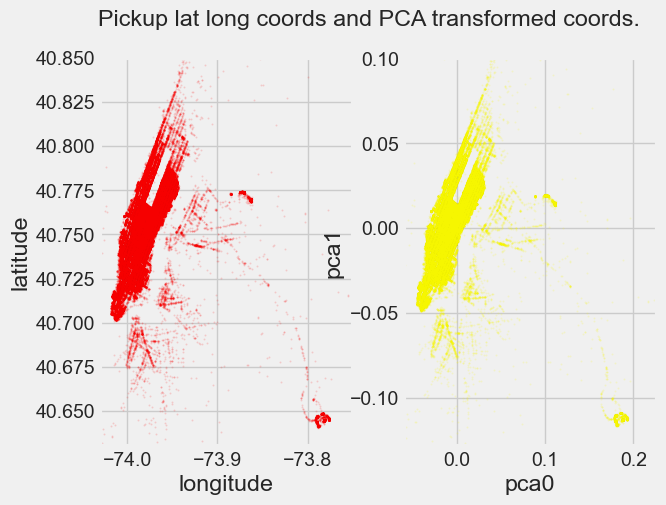

In [52]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
N = 100000
# N = 300

fig, ax = plt.subplots(ncols=2)
ax[0].scatter(df['pickup_longitude'].values[:N], df['pickup_latitude'].values[:N],
              color='red', s=1, alpha=0.1)
ax[1].scatter(df['pickup_pca0'].values[:N], df['pickup_pca1'].values[:N],
              color='yellow', s=1, alpha=0.1)
fig.suptitle('Pickup lat long coords and PCA transformed coords.')
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('pca0')
ax[1].set_ylabel('pca1')
ax[0].set_xlim(city_long_border)
ax[0].set_ylim(city_lat_border)
pca_borders = pca.transform([[x, y] for x in city_lat_border for y in city_long_border])
ax[1].set_xlim(pca_borders[:, 0].min(), pca_borders[:, 0].max())
ax[1].set_ylim(pca_borders[:, 1].min(), pca_borders[:, 1].max())
plt.show()

In [53]:
df['pca_manhattan'] = np.abs(df['dropoff_pca1'] - df['pickup_pca1']) + np.abs(df['dropoff_pca0'] -
                                                                             df['pickup_pca0'])
df_val['pca_manhattan'] = np.abs(df_val['dropoff_pca1'] - df_val['pickup_pca1']) + np.abs(df_val['dropoff_pca0'] -
                                                                             df_val['pickup_pca0'])

In [54]:
# Remove noise from lat and long
df['pickup_lat_bin'] = np.round(df['pickup_latitude'], 2)
df['pickup_long_bin'] = np.round(df['pickup_longitude'], 2)
df['center_lat_bin'] = np.round(df['center_latitude'], 2)
df['center_long_bin'] = np.round(df['center_longitude'], 2)
df['pickup_dt_bin'] = (df['pickup_dt'] // (3 * 3600))

df_val['pickup_lat_bin'] = np.round(df_val['pickup_latitude'], 2)
df_val['pickup_long_bin'] = np.round(df_val['pickup_longitude'], 2)
df_val['center_lat_bin'] = np.round(df_val['center_latitude'], 2)
df_val['center_long_bin'] = np.round(df_val['center_longitude'], 2)
df_val['pickup_dt_bin'] = (df_val['pickup_dt'] // (3 * 3600))


### Clustering

In [55]:
from sklearn.cluster import MiniBatchKMeans
sample_ind = np.random.permutation(len(coords))[:1000000]
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coords[sample_ind])

In [56]:
df['pickup_cluster'] = kmeans.predict(df[['pickup_latitude', 'pickup_longitude']])
df['dropoff_cluster'] = kmeans.predict(df[['dropoff_latitude', 'dropoff_longitude']])
df_val['pickup_cluster'] = kmeans.predict(df_val[['pickup_latitude', 'pickup_longitude']])
df_val['dropoff_cluster'] = kmeans.predict(df_val[['dropoff_latitude', 'dropoff_longitude']])

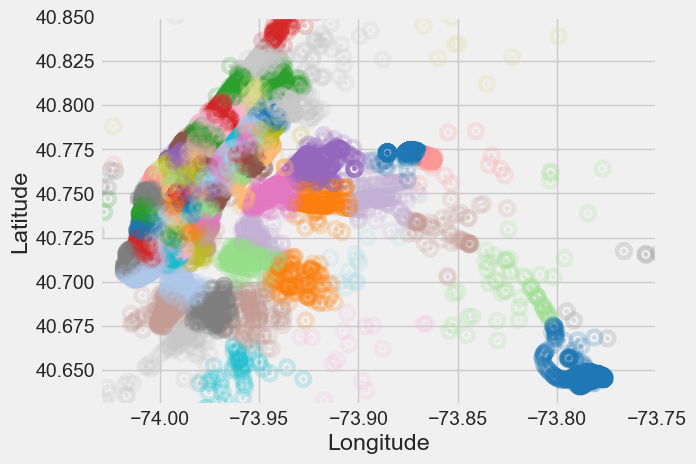

In [57]:
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(df.pickup_longitude.values[:N], df.pickup_latitude.values[:N], s=10,
          lw=10, c=df.pickup_cluster[:N].values, cmap='tab20', alpha=0.2)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [58]:
df = df.drop(['pickup_datetime_year', 'trip_duration'], axis=1)
df_val = df_val.drop(['pickup_datetime_year', 'trip_duration'], axis=1)

In [59]:
target_column = 'log_trip_duration'
df[target_column] = df.pop(target_column)
df_val[target_column] = df_val.pop(target_column)

### Correlation between features and trip_duration

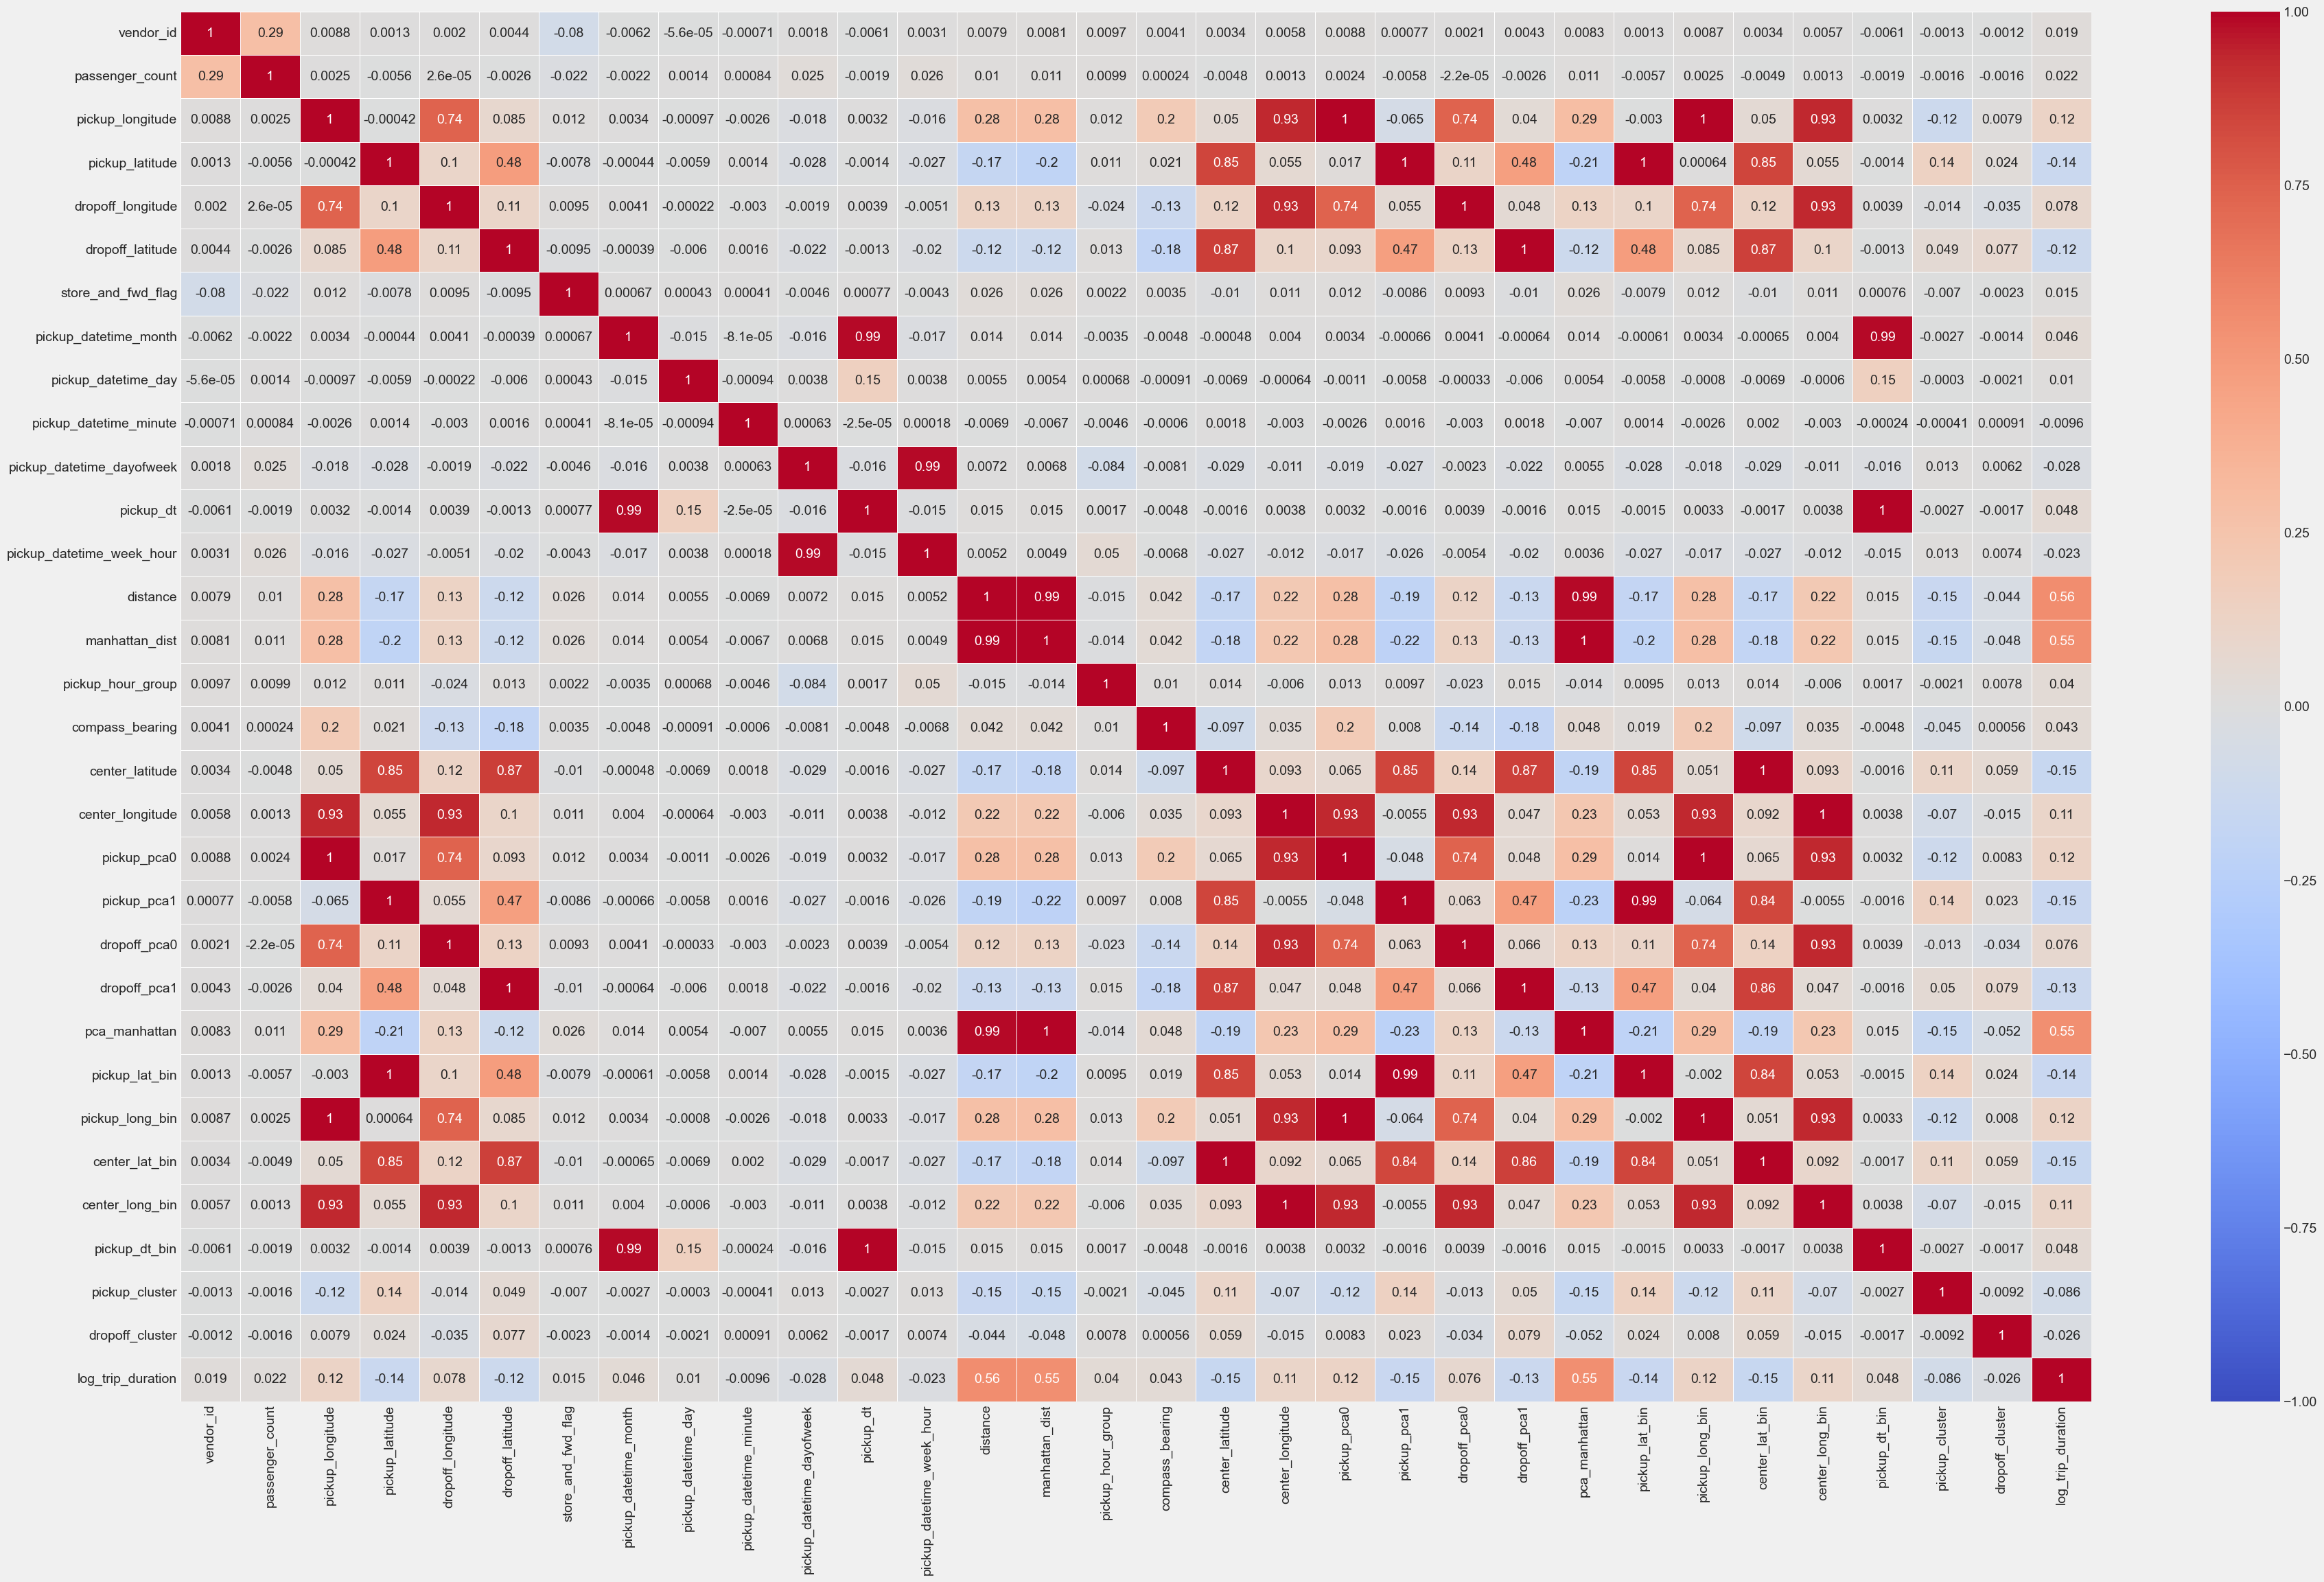

In [60]:
df_corr = df.iloc[:,0:-1]
df_corr['log_trip_duration'] = df['log_trip_duration']
corr = df_corr.corr()

fig = plt.figure(figsize=(40,25))

#Here we use cmap CoolWarm as it gives us a better view of postive and negative correlation.
#And with the help of vmin and vmax set to -1 and +1 , the features having values closer to +1 have positive correlation and features having values closer to -1 have negative correlation.
sns.heatmap(corr,annot=True,linewidths=.5,cmap='coolwarm',vmin=-1,vmax=1,center=0);

### EDA and Feature Engineering finished!!
### Thank You